This notebook demonstrates some kernels from the S+Leaf package

In [1]:
import os
import sys
import math
%load_ext autoreload
%autoreload 2

import numpy as np

# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from spleaf import cov, term

import pandas as pd
pd.set_option('precision', 0)
pd.set_option('display.float_format', lambda x: '%.16f' % x)

# Start the notebook from the root of the project
if 'notebooks' in os.getcwd():
    os.chdir(os.path.dirname(os.getcwd()))
    if os.getcwd().endswith('notebooks'):
        os.chdir(os.path.dirname(os.getcwd()))

 # Local imports (i.e., my code) from the src folder
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from plot_helpers import *
plotter = PlotUtilSPLeaf()

In [2]:
np.linspace(-5, 5, 11).tolist()

[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [3]:
np.array([np.linspace(-5, 5, 11)-i for i in range(-5, 5, 1)])

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.],
       [-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-9., -8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.]])

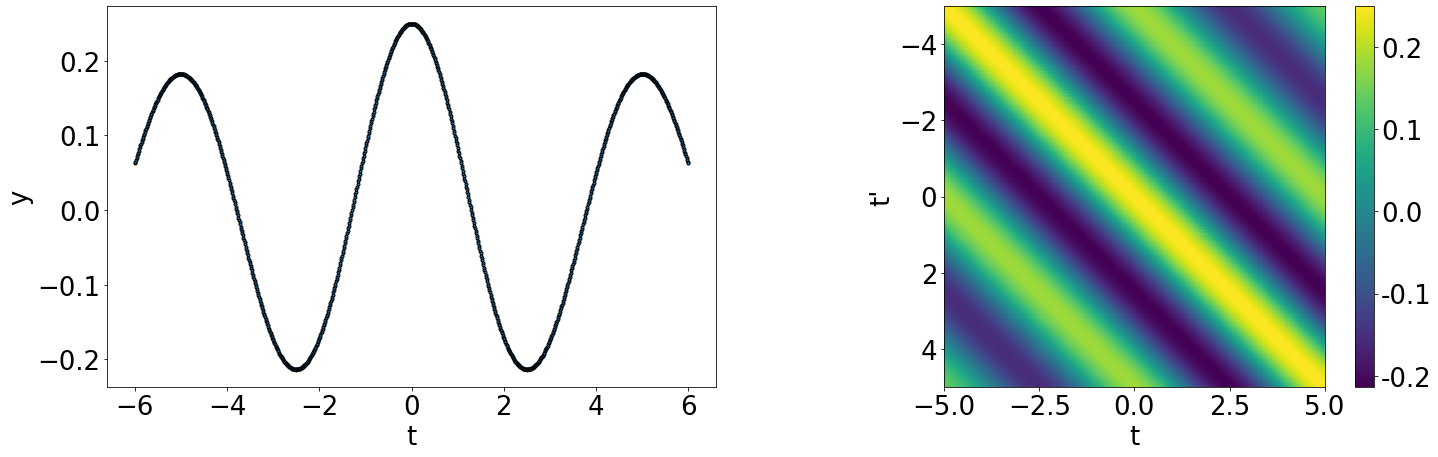

In [5]:
# Damped kernel
sho = term.SHOKernel(sig=0.5, P0=5.0, Q=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(sho, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(sho, fig, ax2, [-0.2, -0.1, 0.0, 0.1, 0.2])

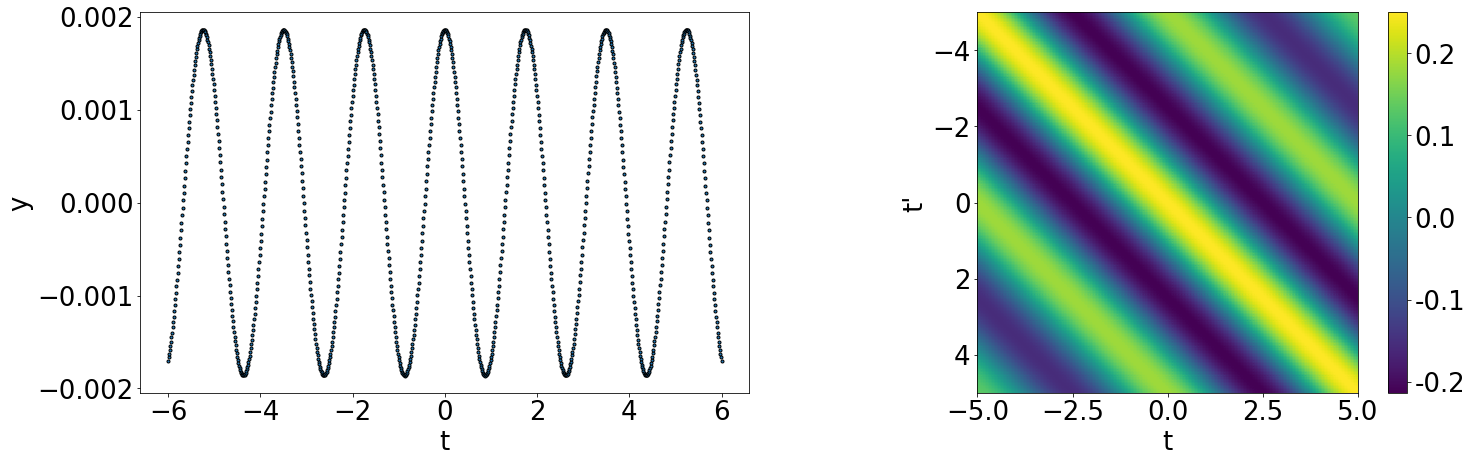

In [7]:
# Two stochastically-driven harmonic oscillator
# One Uncorrelated measurement errors (yerr)
# Calibration errors (correlated noise)
calib_id = np.linspace(-10, 10, 11).astype(int)
caliberr = np.random.uniform(0.5, 1.5, calib_id[-1] + 1)
yerr_calib = caliberr[calib_id]

cov_matrix = cov.Cov(np.linspace(-5, 5, 11),
                     sho=term.SHOKernel(sig=-0.04314, P0=1.7474, Q=8019.36505),
                     calerr=term.CalibrationError(calib_id, yerr_calib)
                     )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(cov_matrix, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(sho, fig, ax2, [-0.2, -0.1, 0.0, 0.1, 0.2])

In [ ]:
sho1 = term.SHOKernel(sig=0.5, P0=1.7, Q=100000)
sho2 = term.SHOKernel(sig=0.5, P0=10, Q=100000)
plotter.plot_2d_kernel(sho1+sho2)